## Simulation of Iterative Best Responses with Asymmetric Costs

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Set parameters
alpha_d = 100
beta_d = 0.5
# marginal cost for Firm 1
b1 = 0.5  
# marginal cost for Firm 2
b2 = 0.1  


def best_response_firm2(q1):
    return (alpha_d - q1 - beta_d * b2) / 2.0

def best_response_firm1(q2):
    return (alpha_d - q2 - beta_d * b1) / 2.0



# Cournot equilibrium from simultaneous
q1_eq = (alpha_d + beta_d * (b2 - 2*b1)) / 3.0
q2_eq = (alpha_d + beta_d * (b1 - 2*b2)) / 3.0
cournot_eq = (q1_eq, q2_eq)

# Simulation parameters

# starting output for Firm 1
start_q1 = 3.0  
iterations = 10  

# initial point on Firm 1's best-response line:
# Firm 1's best response function

start_q2 = (alpha_d - beta_d * b1) - 2 * start_q1

# start the trajectory with the starting point

trajectory = []

q1, q2 = start_q1, start_q2
trajectory.append((q1, q2))




# iterative 

for _ in range(iterations):
    # Firm 2 updates its output given Firm 1's last move.
    new_q2 = best_response_firm2(q1)
    trajectory.append((q1, new_q2))
    
    # Firm 1 updates its output given Firm 2's move.
    new_q1 = best_response_firm1(new_q2)
    trajectory.append((new_q1, new_q2))
    
    q1, q2 = new_q1, new_q2




# best response curves for plotting:
q1_vals = np.linspace(0, alpha_d - beta_d * b2, 200)
# red curve (Firm 1)
q2_br_A = alpha_d - beta_d * b1 - 2 * q1_vals      
 # blue curve (Firm 2)
q2_br_B = (alpha_d - beta_d * b2 - q1_vals) / 2.0   





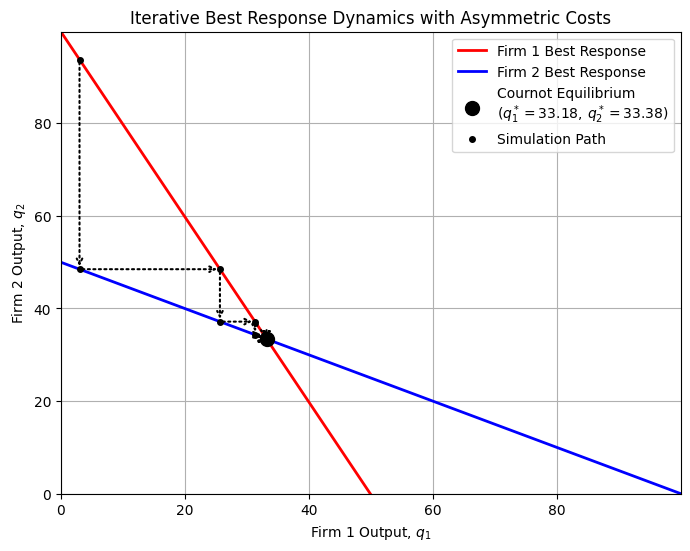

In [2]:

# --- Plotting ---

plt.figure(figsize=(8, 6))
plt.plot(q1_vals, q2_br_A, label="Firm 1 Best Response", color="red", lw=2)
plt.plot(q1_vals, q2_br_B, label="Firm 2 Best Response", color="blue", lw=2)
plt.scatter(*cournot_eq, color='black', s=100, zorder=5, 
            label="Cournot Equilibrium\n($q_1^*={:.2f},\,q_2^*={:.2f}$)".format(q1_eq, q2_eq))

# Plot the simulation trajectory using dotted black arrows.
traj_points = np.array(trajectory)
for i in range(1, len(traj_points)):
    x_prev, y_prev = traj_points[i-1]
    x_curr, y_curr = traj_points[i]
    plt.annotate("",
                 xy=(x_curr, y_curr), xycoords='data',
                 xytext=(x_prev, y_prev), textcoords='data',
                 arrowprops=dict(arrowstyle="->", color="black", linestyle="dotted", lw=1.5))

# Also mark the simulation points.
plt.plot(traj_points[:, 0], traj_points[:, 1], 'ko', markersize=4, label='Simulation Path')

plt.xlabel("Firm 1 Output, $q_1$")
plt.ylabel("Firm 2 Output, $q_2$")
plt.title("Iterative Best Response Dynamics with Asymmetric Costs")
plt.legend()
plt.grid(True)
plt.xlim(0, alpha_d - beta_d * b2)
plt.ylim(0, alpha_d - beta_d * b1)
plt.show()


In [3]:

# results
p_cournot = (alpha_d + beta_d*(b1+b2)) / (3 * beta_d)
print("Cournot Equilibrium:")
print(f"  Firm 1 Output (q₁*): {q1_eq:.2f}")
print(f"  Firm 2 Output (q₂*): {q2_eq:.2f}")
print(f"  Total Output (Q): {q1_eq + q2_eq:.2f}")
print(f"  Market Price (p): {p_cournot:.2f}")

Cournot Equilibrium:
  Firm 1 Output (q₁*): 33.18
  Firm 2 Output (q₂*): 33.38
  Total Output (Q): 66.57
  Market Price (p): 66.87
